# Set Up Notebook

In [2]:
# setup notebook for interactive graphs
%matplotlib widget

## Set up corpuses

In [3]:
corpus_bark = [
    ["Dog", "Bark"],
    ["Tree", "Bark"],
    ["Dog","Sound", "Bark"],
    ["Tree", "Sound", "Creak"]
]

corpus_food = [
    ["Dog"],
    ["Cat"],
    ["Rabbit"],
    ["Fish"],
    ["Dog", "Fish"],
    ["Cat", "Fish"],
    ["Cat", "and", "Dog"],
    ["Chips"],
    ["Fish", "and", "Chips"],
    ["Burger"],
    ["Burger", "and", "Chips"],
    ["Burger", "Dinner"],
    ["Fish", "Dinner"],
    ["Chips", "Dinner"],
    ["Rabbit", "Pet"],
    ["Fish", "Pet"],
    ["Cat", "Pet"],
    ["Dog", "Pet"]
]

corpus_capital = [
    ["Paris", "Capital"],
    ["Rome", "Capital"],
    ["Rome", "Italy"],
    ["Paris", "France"],
    ["Italy", "Country"],
    ["France", "Country"],
    ["England", "Country"],
    ["London", "England"],
    ["London", "Capital"],
    ["Cardiff", "Wales"],
    ["Wales", "Country"],
    ["Cardiff", "Capital"],
    ["Madrid", "Spain"],
    ["Madrid", "Capital"],
    ["Spain", "Country"],
    ["Edinburgh", "Scotland"],
    ["Scotland", "Country"],
    ["Edinburgh", "Capital"],
    ["Greece", "Athens"],
    ["Athens", "Capital"],
    ["Greece", "Country"]
]

corpus_capital_small = [
    ["Paris", "Capital"],
    ["Rome", "Capital"],
    ["Rome", "Italy"],
    ["Paris", "France"],
    ["Italy", "Country"],
    ["France", "Country"]
]

In [3]:
import nltk
from nltk.corpus import brown
nltk.download('brown')

corpus_brown = brown.sents()

[nltk_data] Downloading package brown to
[nltk_data]     C:\Users\danca\AppData\Roaming\nltk_data...
[nltk_data]   Package brown is already up-to-date!


## Load pretrained embeddings models

bark has very small magnitude because it is the least discriminating.

sound has the most different vector as it is the most discriminating

dog and tree have similar vectors even though they don't co-occur, is this interference? i think so

In [4]:
import gensim.downloader as api

model_google_news = api.load('word2vec-google-news-300')
model_glove = api.load("glove-wiki-gigaword-50")

# Tooling

AttributeError: 'KeyedVectors' object has no attribute 'cosine_similarity'

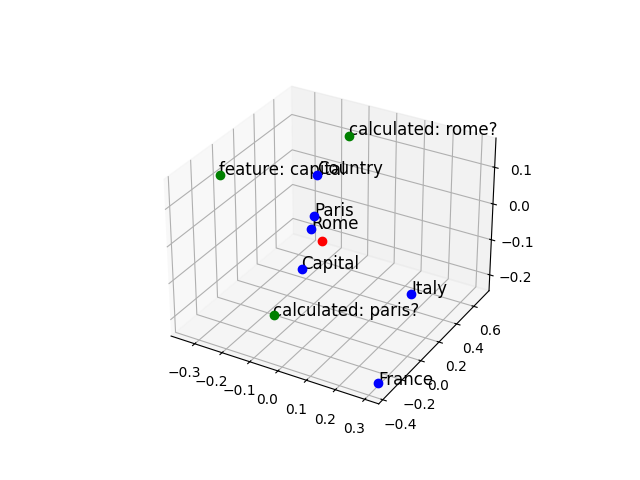

In [30]:
import numpy as np
from gensim.models import Word2Vec
import matplotlib.pyplot as plt

def train_model(corpus, dimensions):
  # Train Word2Vec model
  model = Word2Vec(corpus, vector_size=dimensions, window=5, min_count=1, sg=1)
  return model

def corpus_vocab(corpus):
  return np.unique([word for sublist in corpus for word in sublist])

def getCoords(vocab, model):
  xs = []
  ys = []

  for word in vocab:
    v = model.wv[word]
    xs.append(v[0])
    ys.append(0)
  return xs, ys

def plot_on_graph(point, annotation, graph):
  graph.plot(point[0], point[1], point[2],  'go')
  graph.text(point[0] * (1 + 0.01), point[1] * (1 + 0.01), point[2] * (1 + 0.01) , annotation, fontsize=12)
  return graph

def plot_point(point, ax, dimensions, colour):
  v = point["vector"]
  if dimensions <=2:
    ax.plot(v[0], v[1], colour)
    ax.text(v[0] * (1 + 0.01), v[1] * (1 + 0.01) , point["annotation"], fontsize=12)

  elif dimensions >=3:
    # syntax for 3-D projection
    ax.plot(v[0], v[1], v[2], colour)
    ax.text(v[0] * (1 + 0.01), v[1] * (1 + 0.01) , v[2] * (1 + 0.01) , point["annotation"], fontsize=12, zorder=1)
  return ax

def plot(points, dimensions, additional_points):
  fig = plt.figure()
  if dimensions>=3:
    ax = plt.axes(projection ='3d')
    #plot origin
    ax.plot(0, 0, 0, 'ro')
  elif dimensions==2:
    ax = plt.axes()
    #plot origin
    ax.plot(0, 0, 'ro')
  
  for i, p in enumerate(points):
    ax = plot_point(p, ax, dimensions, "bo")
  for i, p in enumerate(additional_points):
    ax = plot_point(p, ax, dimensions, "go")
    
  return fig

def prepare_word_plots(vocab, model):
  points = []
  for i, word in enumerate(vocab):
    v = model.wv[word]
    p = {
      "annotation": word,
      "vector": v
    }
    points.append(p)

  return points

def all(corpus, dimensions):
  vocab = corpus_vocab(corpus)
  model = train_model(corpus, dimensions)
  word_points = prepare_word_plots(vocab, model)
  points = word_points
  additional_points = [
    {
      "annotation": "feature: capital",
      "vector": model.wv["Rome"] - model.wv["Italy"]
    },
    {
      "annotation": "calculated: paris?",
      "vector": model.wv["Rome"] - model.wv["Italy"] + model.wv["France"]
    },
    {
      "annotation": "calculated: rome?",
      "vector": model.wv["Paris"] - model.wv["France"] + model.wv["Italy"]
    },

  ]
  graph = plot(points, dimensions, additional_points)
  return model, vocab, graph

#all(corpus, 1)
model, vocab, graph = all(corpus_capital_small, 3)
model.wv.cosine_similarity(model.wv["Rome"]-model.wv["Italy"]+model.wv["France"], model.wv["Paris"])
#plot_on_graph([0,1,2], "", graph)


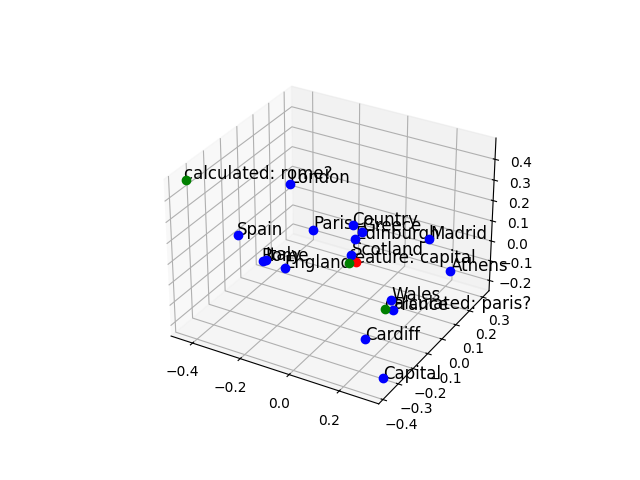

In [27]:
model, vocab, graph = all(corpus_capital, 3)

The cosine similarity ranges from -1 to 1:
1: Indicates identical vectors (perfect similarity).
0: Implies no similarity (orthogonal vectors).
-1: Represents opposite vectors (maximum dissimilarity).

len vocab:  860


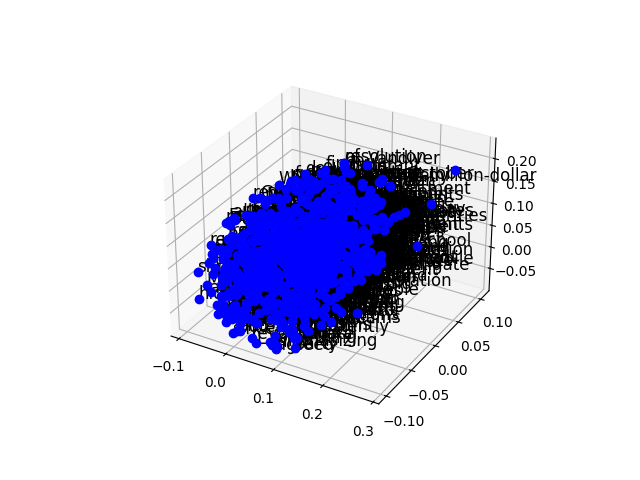

In [16]:
corpus = corpus_brown[:100]
brown_model, vocab, graph = all(corpus, 10) # todo, way to only plot subset of points on graph
model = brown_model
print("len vocab: ", len(vocab))

# Experiments

In [6]:
model_google_news.most_similar(positive=['man'], negative=['potato'])

[('woman', 0.512745201587677),
 ('teenager', 0.42085593938827515),
 ('boy', 0.41502395272254944),
 ('teenage_girl', 0.40686455368995667),
 ('suspected_purse_snatcher', 0.38468220829963684),
 ('men', 0.37045347690582275),
 ('girlfriend', 0.3650696873664856),
 ('teen_ager', 0.36436158418655396),
 ('robber', 0.3615001440048218),
 ('girl', 0.36067575216293335)]

In [7]:
model_google_news.most_similar(positive=['car'], negative=['cat'])

[('vehicle', 0.5048961043357849),
 ('cars', 0.5032103657722473),
 ('minivan', 0.4524582326412201),
 ('Ford_Focus', 0.43961387872695923),
 ('vehicles', 0.43748754262924194),
 ('Subaru_WRX', 0.42426130175590515),
 ('SUV', 0.4210273325443268),
 ('Mercedes', 0.41875159740448),
 ('Toyota_Corolla', 0.4186876714229584),
 ('Toyota_Camry', 0.4182584583759308)]

In [8]:
model_google_news.most_similar(positive=['car'])

[('vehicle', 0.7821096181869507),
 ('cars', 0.7423831224441528),
 ('SUV', 0.7160962224006653),
 ('minivan', 0.6907036900520325),
 ('truck', 0.6735789775848389),
 ('Car', 0.6677608489990234),
 ('Ford_Focus', 0.667320191860199),
 ('Honda_Civic', 0.6626849174499512),
 ('Jeep', 0.651133120059967),
 ('pickup_truck', 0.6441438794136047)]

In [5]:
model_google_news.most_similar(positive=['woman', 'king'], negative=['man'])

[('queen', 0.7118193507194519),
 ('monarch', 0.6189674139022827),
 ('princess', 0.5902431011199951),
 ('crown_prince', 0.5499460697174072),
 ('prince', 0.5377321839332581),
 ('kings', 0.5236844420433044),
 ('Queen_Consort', 0.5235945582389832),
 ('queens', 0.5181134343147278),
 ('sultan', 0.5098593831062317),
 ('monarchy', 0.5087411999702454)]

for topics to be interfering, they have to be unrelated and non-co-occurring but close in vector space. Is this even possible given how embeddings work?



when I asked dad the difference between a car and a potato, he proceded to list certain differences such as not living, natural/unnatural, made out of components,

I suppose more what the difference is, is not the difference between their concepts, but the difference in how they occur in text - these things are related but not the same.

rearranging the equation may help understand.

